#**Pandas**

It's a library that is used for big data analysis and the name Pandas comes from "Python Data Analysis Library" so first import pandas

In [ ]:
import pandas as pd

##Series

Firstly, we need to talk about some of the building blocks in Pandas and the first one discussed is Series

Series are like arrays, 1 dimensional data that normally represents a column in a dataset

In [ ]:
#Making a basic series
#this is just like np.array([some array])

a = pd.Series([1,2,3],dtype='int8')
print(a)
print(a[0])

0    1
1    2
2    3
dtype: int8
1


As seen above, just like with normal arrays the data above or the series above has indices which by default start at 0, just like arrays or lists.

However the index for the Series can be customized and we can specify that with the index = parameter in pd.Series as such...

In [ ]:
a = pd.Series([1,45,73,20],dtype='int8',index=['a','b','c','d'],name="my first")
print(a)

a     1
b    45
c    73
d    20
Name: my first, dtype: int8


As seen above the index parameter is another list that MUST be of the same size as the Series, but each individual index can be the same or different.

Now we can access the values as if we were accessing a dictionary!!

---



In [ ]:
print(a[0])
##Or print the specific index name to get the value
print(a['b'])
print(f'I am printing the name of the array a as: {a.name}')

1
45
I am printing the name of the array a as: my first


But dont worry, we can still access the values using the classic numerical indices and we can access the name of the series with the: name method

##Parameters

* name = 'Name of array given'
* dtype = 'int8' - size and type stored
* index = [list of index names]
* copy = boolean, by default false
* data - can be a list or a dictionray with the keys being the indices and the values, the value at each index

In [ ]:
a = {'red':3,'blue':5,'green':9}
a = pd.Series(a)
print(a)

red      3
blue     5
green    9
dtype: int64


In [ ]:
#We could limit the numbers of rows by setting
#indices that purposely exclude certain rows
a = pd.Series(a,index=['red'])
print(a)

red    3
dtype: int64

##DataFrames

DataFrames are literally like tables of data, except that they are made from dictionaries.

In [ ]:
#courtesy of W3Schools
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

dframe = pd.DataFrame(data,index=[1,2,3])

print(dframe)

   calories  duration
1       420        50
2       380        40
3       390        45


As seen above the 2-D dataframe is printed and the column heading are the dictionary keys and the values are the data in the table. As usual, since indices are not specified. Each row is represented as a number starting at 0

##Parameters

* index = [list of indices]
* dtype = 'int32' - by default

Some others but aren't too practical

###Column Prints

We can print out specific columns by saying:

df['some column'] with the print function

##Loading CSV data

So we might want to actually work with some data so we have to read the data in and turn it into a good format so lets try that out with the red_csv method

In [ ]:
try:
  dataframe = pd.read_csv('data.csv') #this will read data from a CSV file
  dataframe.to_string() #this will print the entire dataset
except Exception:
  print("I/O Exception for sure")

##Loading JSON data

Sometimes data is actually found in a json file instead so we can use the same technique like before but with the json files

I would like to remind the reader that we can actually use a dictionary of dictionaries to use as data since JSOn files are actually python dictionaries in disguise

In [ ]:
try:
  dataframe = pd.read_csv('data.json') #this will read data from a json file
  dataframe.to_string() #this will print the entire dataset
except Exception:
  print("I/O Exception for sure")

data = {
  "Duration":{
    "0":60,
    "1":60,
    "2":60,
    "3":45,
    "4":45,
    "5":60
  },
  "Pulse":{
    "0":110,
    "1":117,
    "2":103,
    "3":109,
    "4":117,
    "5":102
  },
  "Maxpulse":{
    "0":130,
    "1":145,
    "2":135,
    "3":175,
    "4":148,
    "5":127
  },
  "Calories":{
    "0":409,
    "1":479,
    "2":340,
    "3":282,
    "4":406,
    "5":300
  }
}

a = pd.DataFrame(data)
#print(a.to_latex()) ##does it latex style
print(a.to_string())

I/O Exception for sure
   Duration  Pulse  Maxpulse  Calories
0        60    110       130       409
1        60    117       145       479
2        60    103       135       340
3        45    109       175       282
4        45    117       148       406
5        60    102       127       300


##Viewing Data

There are many ways to view the whole dataset or pieces of it but we can use the to_string() method or the head(rows) method

data.head(#rows to view) - view n rows or by default the first 5 rows

###Head method

In [ ]:
import numpy
d = pd.DataFrame(a)
d.head(6)  #whole set or a n number of rows
#if you exceed the total number of rows it will print the whole thing and ignore the input extra

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409
1,60,117,145,479
2,60,103,135,340
3,45,109,175,282
4,45,117,148,406
5,60,102,127,300


###Tail Method

We can view the first n rows with d.head(5)

We can view the LAST n rows with d.tail()

In [ ]:
d.tail(3)

,Duration,Pulse,Maxpulse,Calories
3,45,109,175,282
4,45,117,148,406
5,60,102,127,300


###Count Method

In [ ]:
d.count() #basically we count the number of rows for all columns

Duration    6
Pulse       6
Maxpulse    6
Calories    6
dtype: int64

###Info on Data

Try the .info() method on any created DataFrame

##Cleaning Data

So now we have to learn to clean our data because data is never clean or perfect when it is first given to us and a solid chunk of the job for a data scientist is the clean up of the data. 

Some of the ways data comes in dirty is:

* empty cells
* data is formatted incorrectly
* Wrong data
* Duplicates

Now I will explain how to deal with the 4 types of situations in order

Firstly, lets import this data to play with it 

In [ ]:
df = pd.read_csv('soccerteam.csv')
df.head(15)

,Score,Name,Division,Players,Position
0,10.0,tim,1,12,forward
1,6.0,jim,2,26,center
2,NaN,kim,3,25,goalie
3,5.0,pam,one,12,center
4,8.0,tom,2,15,backfield
5,12.0,timmy,3,19,forward
6,1.0,bob,3,17,center
7,2.0,billy,2,21,goalie
8,5.0,jimbo,NaN,20,center
9,8.0,fisher,one,12,forward


###Empty Cells

To deal with empty cells we are looking for rows that dont have values in all column names and normally empty values look like: NaN 

We can use a specific function that looks for NaN values:

datafr.dropna()

####Dropna method

Parameters:

  inplace = boolean value, by default it is false so the method returns the new dataframe modified but if we dont want that and change the original datafram directly we can say:

  inplace = true 

In [ ]:
df_copy = df.dropna(inplace=False)
df_copy

,Score,Name,Division,Players,Position
0,10.0,tim,1,12,forward
1,6.0,jim,2,26,center
3,5.0,pam,one,12,center
4,8.0,tom,2,15,backfield
5,12.0,timmy,3,19,forward
6,1.0,bob,3,17,center
7,2.0,billy,2,21,goalie
9,8.0,fisher,one,12,forward
10,4.0,sonny,2,30,forward
12,2.0,matthew,1,9,backfield


For now I set the implace to false so that we get a new dataframe with the NaN values all dropped.

####Fillna Method

We can instead fill in the values with a number with the fillna method:

fillna(0,inplace=true)

Lets try that out for fun with a copy frame:

In [ ]:
df_copy2 = df.fillna(0.0,inplace=False)
df_copy2

,Score,Name,Division,Players,Position
0,10.0,tim,1,12,forward
1,6.0,jim,2,26,center
2,0.0,kim,3,25,goalie
3,5.0,pam,one,12,center
4,8.0,tom,2,15,backfield
5,12.0,timmy,3,19,forward
6,1.0,bob,3,17,center
7,2.0,billy,2,21,goalie
8,5.0,jimbo,0,20,center
9,8.0,fisher,one,12,forward


Now lets actually fill in the values

In [ ]:
df.fillna(0.0,inplace=True)
df

,Score,Name,Division,Players,Position
0,10.0,tim,1,12,forward
1,6.0,jim,2,26,center
2,0.0,kim,3,25,goalie
3,5.0,pam,one,12,center
4,8.0,tom,2,15,backfield
5,12.0,timmy,3,19,forward
6,1.0,bob,3,17,center
7,2.0,billy,2,21,goalie
8,5.0,jimbo,0,20,center
9,8.0,fisher,one,12,forward


####Fillna Column-spec

We can also replace a specific column like the score column

df['score'].fillna(122,inplace=True)

####Fill in with Mean

In [ ]:
df2 = pd.read_csv('soccerteam.csv')
#df2['Score'] I can print just the score
mean = df2['Score'].mean()
df2['Score'].fillna(mean,inplace=True)
print(df2)

        Score     Name Division   Players   Position
0   10.000000      tim         1       12   forward 
1    6.000000      jim         2       26     center
2    5.461538      kim         3       25     goalie
3    5.000000      pam       one       12     center
4    8.000000      tom         2       15  backfield
5   12.000000    timmy         3       19   forward 
6    1.000000      bob         3       17     center
7    2.000000    billy         2       21     goalie
8    5.000000    jimbo       NaN       20     center
9    8.000000   fisher       one       12   forward 
10   4.000000    sonny         2       30   forward 
11   5.461538     seby         3       15  backfield
12   2.000000  matthew         1        9  backfield
13   4.000000   jamela         2       22     goalie
14   4.000000   jamela         2       22     goalie


####Fill in with Median

med = df2['score'].median()
df2['Score'].fillna(median)

Fill in with Mode


mode = df['Score'].mode()

###Wrong Format

So we can do two things: Let us covert some of the bad values to good ones with a pd.to_?(the column) or we can also drop the values if the converstion fails

In [ ]:
#df2['Division'] = pd.to_numeric(df2['Division'])

###Replacing Values

Lets say we want to replace the row value for index 5 of the Score column with 10 instead of 12, we just need to make that change:

In [ ]:
df2.loc[5,'Score'] = 10
df2
#if the elements in a certain row of a specific
#column are smaller than n we can replace with something else
#with a loop

,Score,Name,Division,Players,Position
0,10.000000,tim,1,12,forward
1,6.000000,jim,2,26,center
2,5.461538,kim,3,25,goalie
3,5.000000,pam,one,12,center
4,8.000000,tom,2,15,backfield
5,10.000000,timmy,3,19,forward
6,100.000000,bob,3,17,center
7,2.000000,billy,2,21,goalie
8,5.000000,jimbo,NaN,20,center
9,8.000000,fisher,one,12,forward


We also change the value of certain elements in a row if the values are less that a certain value with a for loop that will touch each index in a list of indices given by dataframe.index

####Changing Rows

In [ ]:
for index in df2.index:
  if df2.loc[index,'Score'] < 2:
    df2.loc[index,'Score'] = 100
df2

,Score,Name,Division,Players,Position
0,10.000000,tim,1,12,forward
1,6.000000,jim,2,26,center
2,5.461538,kim,3,25,goalie
3,5.000000,pam,one,12,center
4,8.000000,tom,2,15,backfield
5,10.000000,timmy,3,19,forward
6,100.000000,bob,3,17,center
7,2.000000,billy,2,21,goalie
8,5.000000,jimbo,NaN,20,center
9,8.000000,fisher,one,12,forward


####Removing Rows


We can also just remove the row if the condition is true

In [ ]:
for index in df2.index:
  if df2.loc[index,'Score'] == 100:
    df2.drop(index,inplace = True)

df2

,Score,Name,Division,Players,Position
0,10.000000,tim,1,12,forward
1,6.000000,jim,2,26,center
2,5.461538,kim,3,25,goalie
3,5.000000,pam,one,12,center
4,8.000000,tom,2,15,backfield
5,10.000000,timmy,3,19,forward
7,2.000000,billy,2,21,goalie
8,5.000000,jimbo,NaN,20,center
9,8.000000,fisher,one,12,forward
10,4.000000,sonny,2,30,forward


###Removing Duplicates

We can also remove duplicate valeus directly, but first we might want to detect them first right?

print(df2.duplicated())

The method returns true for every method that is duplicated

---



In [ ]:
print(df2.duplicated())
df2.drop_duplicates(inplace=True)
df2

0     False
1     False
2     False
3     False
4     False
5     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
dtype: bool


,Score,Name,Division,Players,Position
0,10.000000,tim,1,12,forward
1,6.000000,jim,2,26,center
2,5.461538,kim,3,25,goalie
3,5.000000,pam,one,12,center
4,8.000000,tom,2,15,backfield
5,10.000000,timmy,3,19,forward
7,2.000000,billy,2,21,goalie
8,5.000000,jimbo,NaN,20,center
9,8.000000,fisher,one,12,forward
10,4.000000,sonny,2,30,forward


##Correlation

We can find the correlation between all rows of data, ignoring the ones that have text or non numeric data in them with the corr method

In [ ]:
df2.corr()

,Score,Players
Score,1.000000,-0.215139
Players,-0.215139,1.000000


##Scatterplot

Pandas also has a scatter plot method for plots so we can plot all columns with the

df.plot()

###Parameters

df.plot(kind=, x = 'some column', y='some other column')

Leave all blank and the whole dataset gets printed!

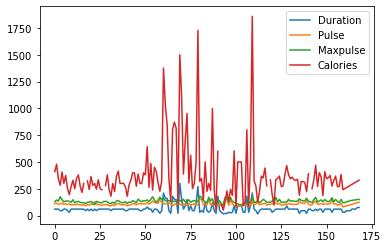

In [ ]:
df = pd.read_csv('data.csv')
#df - WE print the first 5 and last 5 rows 
df.plot()

We can also plot specific columns as part of the x,y axis

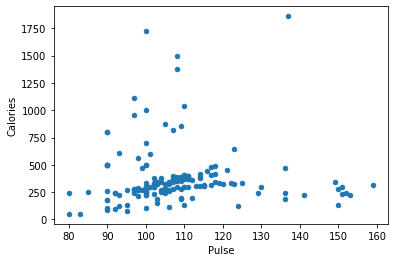

In [ ]:
df.plot(kind ='scatter',x ='Pulse',y ='Calories')

###Histograms

We can even plot histograms of a specific column such as the following for Duration field

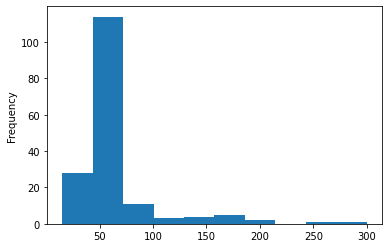

In [ ]:
df['Duration'].plot(kind='hist')

##Statistics

So we are finally at the part where we calculate common statistical parameter for use in modeling so we can start by getting the mean and mode and median in the set

###Mean,Median,Mode

In [1]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('data.csv')
df2 = pd.read_csv('soccerteam.csv')

df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [13]:
mean = df['Duration'].mean()
print(mean)

#We can print all the column names
print(df.columns)

mode = df['Duration'].mode()
print(mode)
print(f'The mode of the duration column is {mode}')

median = df['Pulse'].median()
print(f'The mode of the duration column is {median}')

print("--------------Printing column statistics---------")
for column in df.columns:
  median = df[column].median()
  print(f'The mode of the {column} column is {median}')


63.84615384615385
Index(['Duration', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')
0    60
dtype: int64
The mode of the duration column is 0    60
dtype: int64
The mode of the duration column is 105.0
--------------Printing column statistics---------
The mode of the Duration column is 60.0
The mode of the Pulse column is 105.0
The mode of the Maxpulse column is 131.0
The mode of the Calories column is 318.6


###Describe Method

We can use this method when we want to desribe all the data or a portion of the columns in terms of the count, mean, std, min, max and the quartiles

In [14]:
#We can test all columns
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [15]:
#We can also test a specific column or columns in a list format
df[['Duration','Pulse']].describe()

,Duration,Pulse
count,169.000000,169.000000
mean,63.846154,107.461538
std,42.299949,14.510259
min,15.000000,80.000000
25%,45.000000,100.000000
50%,60.000000,105.000000
75%,60.000000,111.000000
max,300.000000,159.000000


###Aggregate Method

We can use this one when we dont want all the stats in the describe but only a couple and just like before we can use a list with the specific stats we are looking for and a dictionary where the keys are the column names we want


In [17]:
#Here the agg takes as an argument a dictionary made up of the column 
#names along with sample statistics we want to find
df.agg(
    {
      'Duration': ['max','min','mean'],
      'Maxpulse': ['max','min','mean']
    }
)

,Duration,Maxpulse
max,300.000000,184.000000
min,15.000000,100.000000
mean,63.846154,134.047337


###Cumulative Sum

We can get the whole dataset but counting the values before it, almost like a fibonacci sequence

In [21]:
#We can get the whole dataset with its cum sum
df.cumsum()

#Or we can get a specific column
#df['Calories'].cumsum()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,120,227,275,888.1
2,180,330,410,1228.1
3,225,439,585,1510.5
4,270,556,733,1916.5
...,...,...,...,...
164,10520,17691,22064,60368.6
165,10580,17801,22209,60668.6
166,10640,17916,22354,60978.8
167,10715,18036,22504,61299.2
